In [4]:
import requests
import datetime

import geopandas as gpd
from shapely.geometry import Point, Polygon

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# the Chicago Data Portal returns 1000 records at a time
# The data must be queried with the offset parameter 
business_df = pd.DataFrame()

for offset in range(0, 60000, 1000):
    # this is the url for active business licences in Chicago.
    active_business_url = f"https://data.cityofchicago.org/resource/uupf-x98q.json?$limit=1000&$offset={offset}"
    response = requests.get(active_business_url)
    offset_df = pd.DataFrame(response.json())
    business_df = pd.concat([business_df,offset_df])

In [19]:
today = datetime.datetime.today().strftime('%m-%d-%Y')

In [20]:
print(f"There are {business_df.shape[0]} active businesses on " 
    + f"{today}")

There are 53437 active businesses on 05-18-2024


In [22]:
print(f"There are {len(business_df['address'].unique())} "
    + "unique business addresses as of "
    + f"{today}")

There are 35818 unique business addresses as of 05-18-2024


In [33]:
def create_geo_df(business_df):
    
    crs = {'init':'EPSG:4326'}
    geometry = [Point(xy) for xy in zip(business_df['longitude'], business_df['latitude'])]
    geo_df = gpd.GeoDataFrame(business_df, 
                          crs=crs,
                          geometry = geometry)
    
    return geo_df

In [46]:
def create_chicago_map(geo_df, markersize):
    shape_file = "../shape_files/geo_export_13b5a44a-41a4-464a-8d09-00ab1c022c4d.shp"
    chicago_map = gpd.read_file(shape_file)
   
    fig, ax = plt.subplots(figsize = (10,10))
    chicago_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
    geo_df.plot(ax=ax, markersize=markersize)
    ax.set_title('Businesses in Chicago')

In [47]:
geo_df = create_geo_df(business_df)


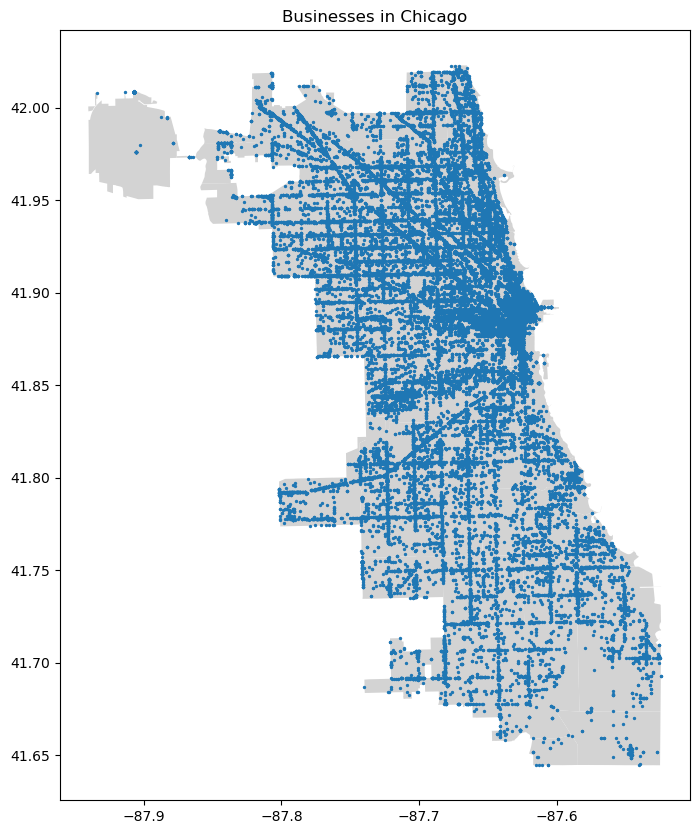

In [48]:
create_chicago_map(geo_df, markersize=2)